# UNEMPLOYEMENT ANALYSIS WITH PYTHON



In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\ayush\Downloads\Unemployment_Rate_upto_11_2020 - Unemployment_Rate_upto_11_2020.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df =pd.read_csv(r'C:\Users\ayush\Downloads\Unemployment in India - Unemployment in India.csv')

In [4]:
df.head()

Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural

In [5]:
df['Area'].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [6]:
df['Date'].dtype

dtype('O')

In [7]:
df[' Date'] =pd.to_datetime(df['Date'])


C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\2150931174.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] =pd.to_datetime(df['Date'])


In [8]:
df.dtypes

Region                                             object
Date                                               object
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
 Date                                      datetime64[ns]
dtype: object

In [9]:
from sklearn.preprocessing import MinMaxScaler

X = df['Estimated Employed'].values.reshape(-1, 1)
scaler = MinMaxScaler()
df['Estimated Employed'] = scaler.fit_transform(X)

In [10]:
df

Region        Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh  31-05-2019   Monthly                             3.65   
1    Andhra Pradesh  30-06-2019   Monthly                             3.05   
2    Andhra Pradesh  31-07-2019   Monthly                             3.75   
3    Andhra Pradesh  31-08-2019   Monthly                             3.32   
4    Andhra Pradesh  30-09-2019   Monthly                             5.17   
..              ...         ...       ...                              ...   
749     West Bengal  29-02-2020   Monthly                             7.55   
750     West Bengal  31-03-2020   Monthly                             6.67   
751     West Bengal  30-04-2020   Monthly                            15.63   
752     West Bengal  31-05-2020   Monthly                            15.22   
753     West Bengal  30-06-2020   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0              0.261321                                    43.24  Rural   
1              0.256002                                    42.05  Rural   
2              0.263236                                    43.50  Rural   
3              0.267588                                    43.97  Rural   
4              0.266955                                    44.68  Rural   
..                  ...                                      ...    ...   
749            0.236654                                    44.09  Urban   
750            0.235231                                    43.34  Urban   
751            0.202284                                    41.20  Urban   
752            0.201003                                    40.67  Urban   
753            0.197680                                    37.57  Urban   

          Date  
0   2019-05-31  
1   2019-06-30  
2   2019-07-31  
3   2019-08-31  
4   2019-09-30  
..         ...  
749 2020-02-29  
750 2020-03-31  
751 2020-04-30  
752 2020-05-31  
753 2020-06-30  

[754 rows x 8 columns]

In [21]:
print(df['Region'].value_counts())
print('*'*33)


Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64
*********************************


In [22]:
print(df['Date'].value_counts())
print('*'*33)

Date
31-10-2019    55
30-11-2019    55
31-05-2019    54
30-06-2019    54
31-07-2019    54
31-08-2019    53
31-12-2019    53
31-01-2020    53
29-02-2020    53
30-09-2019    52
31-03-2020    52
30-04-2020    51
31-05-2020    51
30-06-2020    50
Name: count, dtype: int64
*********************************


In [23]:
print(df['Frequency'].value_counts())
print('*'*33)

Frequency
Monthly    740
Name: count, dtype: int64
*********************************


In [24]:
print(df['Area'].value_counts())

Area
1.0    381
0.0    359
Name: count, dtype: int64


In [12]:
Area_encoding = {'Rural': 0, 'Urban': 1}

# Encode 'Gender' column using loc
df.loc[:, 'Area'] = df['Area'].map(Area_encoding)

In [13]:
rural_df = df[df['Area'] == 0]
urban_df = df[df['Area'] == 1]
print(rural_df.shape)
print(urban_df.shape)

(359, 8)
(381, 8)


In [15]:
grouped_rural_stats = rural_df.groupby('Region').agg({
    'Estimated Unemployment Rate (%)': ['min', 'mean', 'max', 'std'],
    'Estimated Labour Participation Rate (%)': ['min', 'mean', 'max', 'std'],
    'Estimated Employed': ['min', 'mean', 'max']
})

grouped_urban_stats = urban_df.groupby('Region').agg({
    'Estimated Unemployment Rate (%)': ['min', 'mean', 'max', 'std'],
    'Estimated Labour Participation Rate (%)': ['min', 'mean', 'max', 'std'],
    'Estimated Employed': ['min', 'mean', 'max']
})

grouped_rural_stats.columns = ['Unemployment Rate Min', 'Unemployment Rate Mean','Unemployment Rate Max', 'Unemployment Rate Std',
                         'Labour Participation Rate Min', 'Labour Participation Rate Mean','Labour Participation Rate Max','Labour Participation Rate Std',
                            'Estimated Employed Min', 'Estimated Employed Mean','Estimated Employed Max']
grouped_urban_stats.columns = ['Unemployment Rate Min', 'Unemployment Rate Mean','Unemployment Rate Max', 'Unemployment Rate Std',
                         'Labour Participation Rate Min', 'Labour Participation Rate Mean','Labour Participation Rate Max','Labour Participation Rate Std',
                           'Estimated Employed Min', 'Estimated Employed Mean','Estimated Employed Max']

In [16]:
def plot_heatmap_(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(30,25))  # Create a figure with two subplots

    # Plot the first column
    sns.heatmap(data.loc[:, ['Unemployment Rate Min', 'Unemployment Rate Mean','Unemployment Rate Max']], ax=axs[0], annot=True,cmap="coolwarm",annot_kws={"size": 22})
    axs[0].set_title('Unemployment Rate', fontsize=15)

    # Plot the second column
    sns.heatmap(data.loc[:, ['Labour Participation Rate Min', 'Labour Participation Rate Mean','Labour Participation Rate Max']], ax=axs[1], annot=True, cmap="coolwarm",annot_kws={"size": 22})
    axs[1].set_title('Labour Participation Rate', fontsize=15)

    # Set the overall title for the figure 
    plt.suptitle(title, fontsize=15)
    axs[0].set_xlabel('Statistics', fontsize=15)
    axs[0].set_ylabel('Region', fontsize=15)
    axs[1].set_xlabel('Statistics', fontsize=15)
    axs[1].set_ylabel('Region', fontsize=15)
    axs[0].tick_params(axis='x', rotation=45, labelsize=21)
    axs[0].tick_params(axis='y', labelsize=22)
    axs[1].tick_params(axis='x', rotation=45, labelsize=21)
    axs[1].tick_params(axis='y', labelsize=22)
    plt.tight_layout()

In [17]:
grouped_df = df.groupby('Region')


def plot_rate_col_rate(grouped_df, rate_col):
   
    # Iterate over unique regions
    for region, region_data in grouped_df:
        # Convert date column to datetime if it's not already
        region_data['Date'] = pd.to_datetime(region_data['Date'])
        
        # Sort region data by date
        region_data.sort_values(by=' Date', inplace=True)
        
        # Filter region data for rural and urban areas
        rural_data = region_data[region_data['Area'] == 0]
        urban_data = region_data[region_data['Area'] == 1]
        
        # Plot the data for rural and urban areas
        plt.figure(figsize=(10, 6))
        plt.plot(rural_data['Date'], rural_data[rate_col], marker='o', linestyle='-', label='Rural')
        plt.plot(urban_data['Date'], urban_data[rate_col], marker='o', linestyle='-', label='Urban')
        plt.title(f'{rate_col} Over Time for {region}')
        plt.xlabel('Date')
        plt.ylabel(f'{rate_col}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

In [31]:
def plot_comparison(data_urban, data_rural, y_label, title):
   
    plt.figure(figsize=(30, 14))
    plt.plot(data_urban, label='Urban', marker='o', linewidth=4)
    plt.plot(data_rural, label='Rural', marker='o', linewidth=4)
    plt.title(title, fontsize=22)
    plt.xlabel('Regions',fontsize=22)
    plt.ylabel(y_label, fontsize=22)
    plt.xticks(rotation=90, fontsize=25)
    plt.yticks(rotation=0, fontsize=22)
    plt.legend(prop={'size': 24})
    plt.grid(True)
    plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


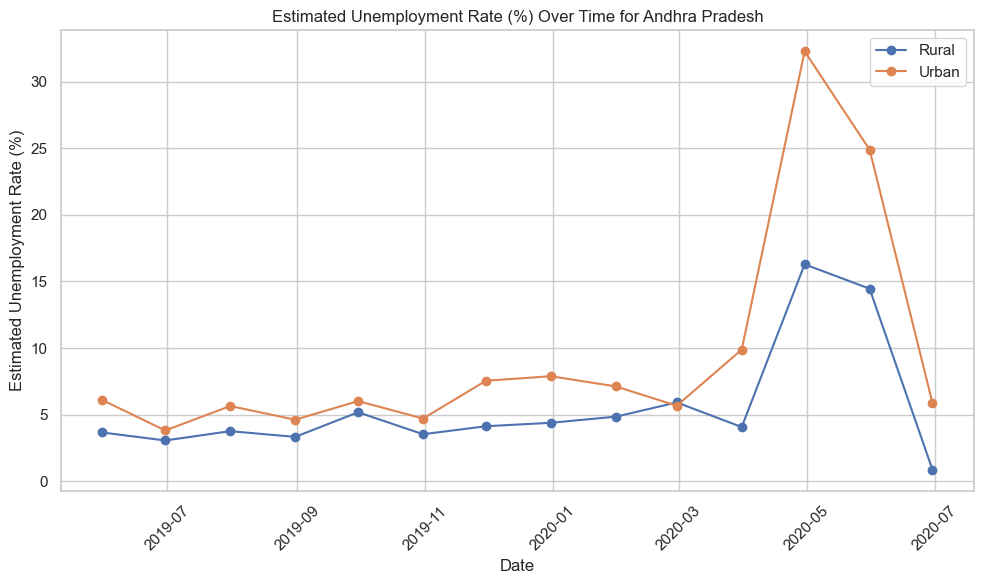

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


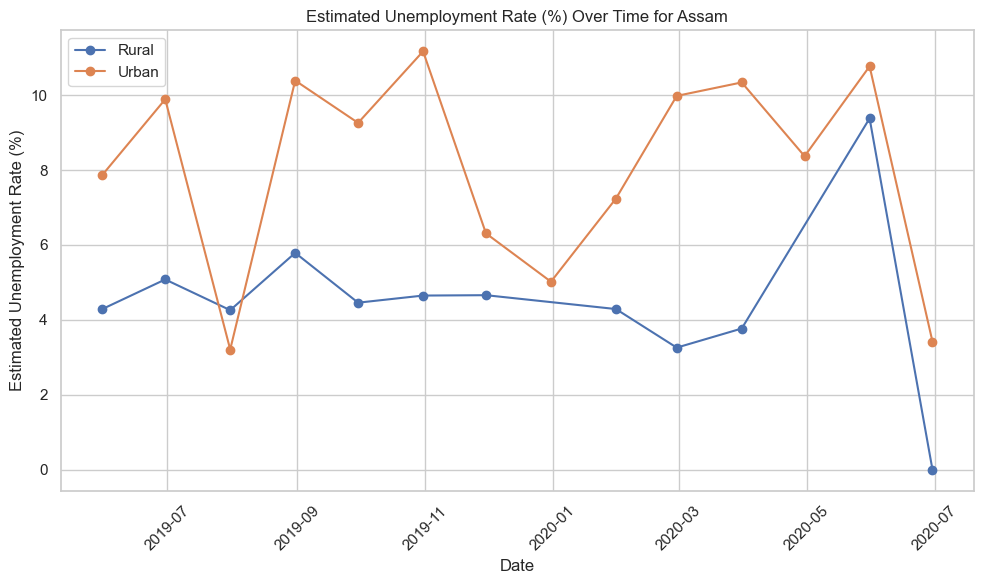

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


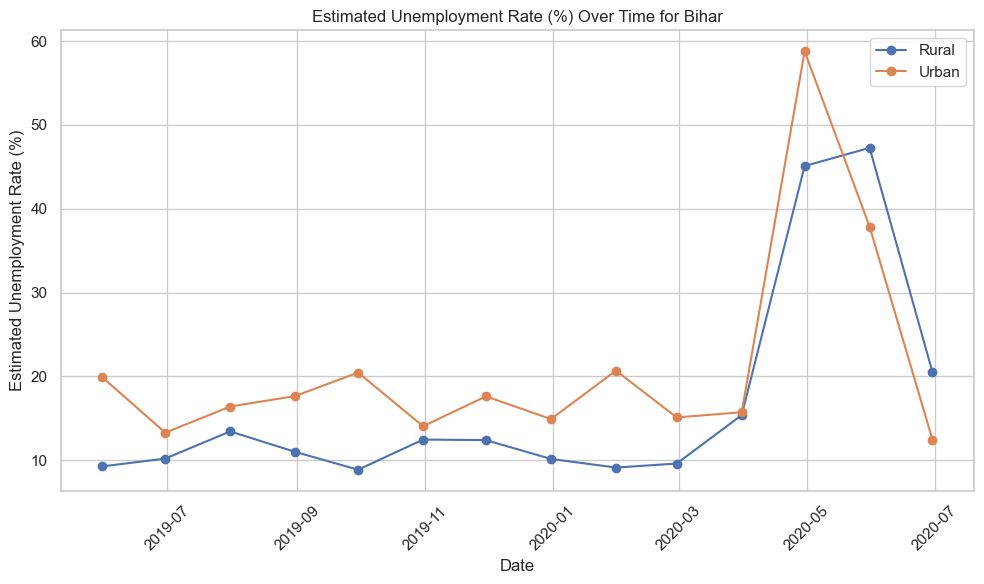

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


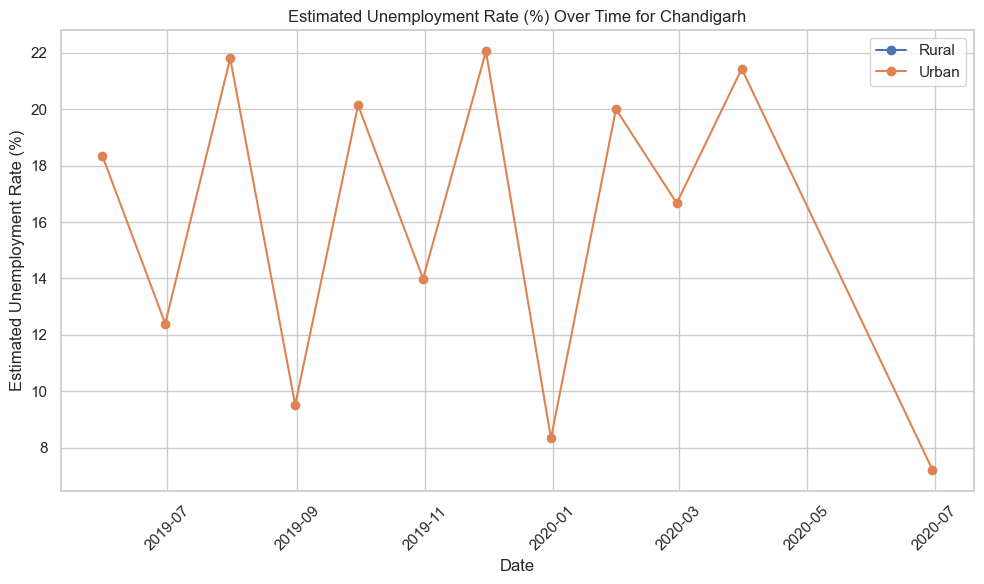

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


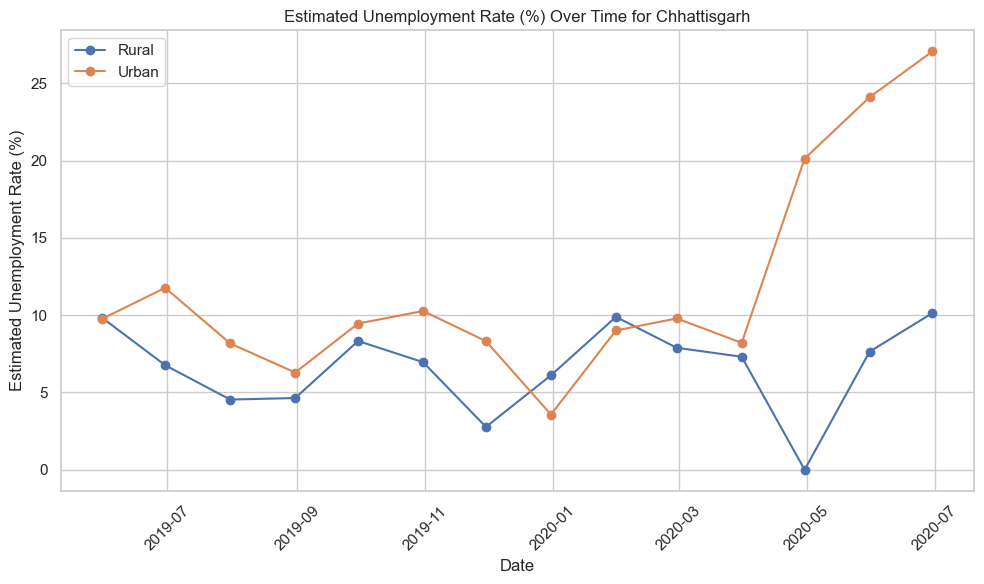

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


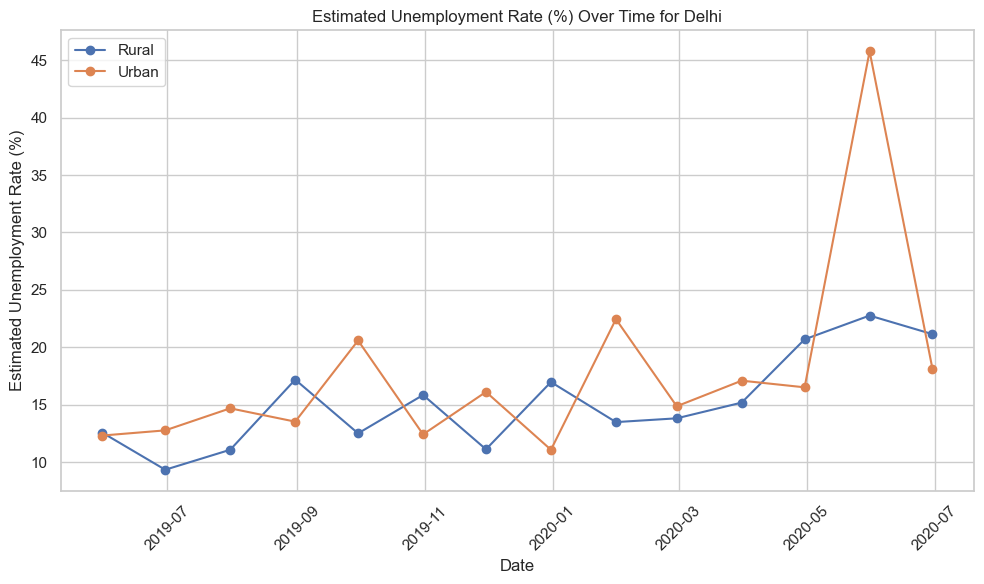

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


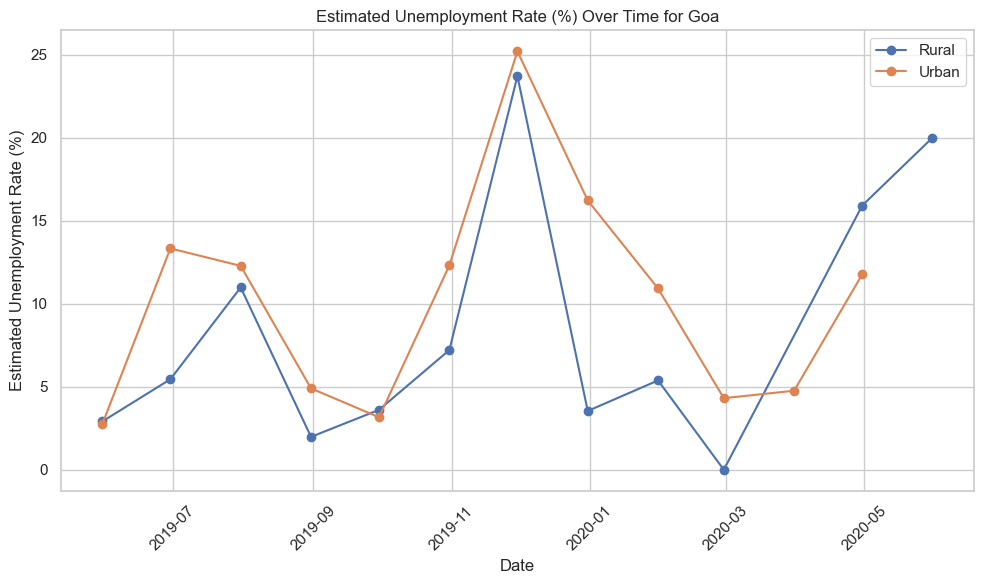

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


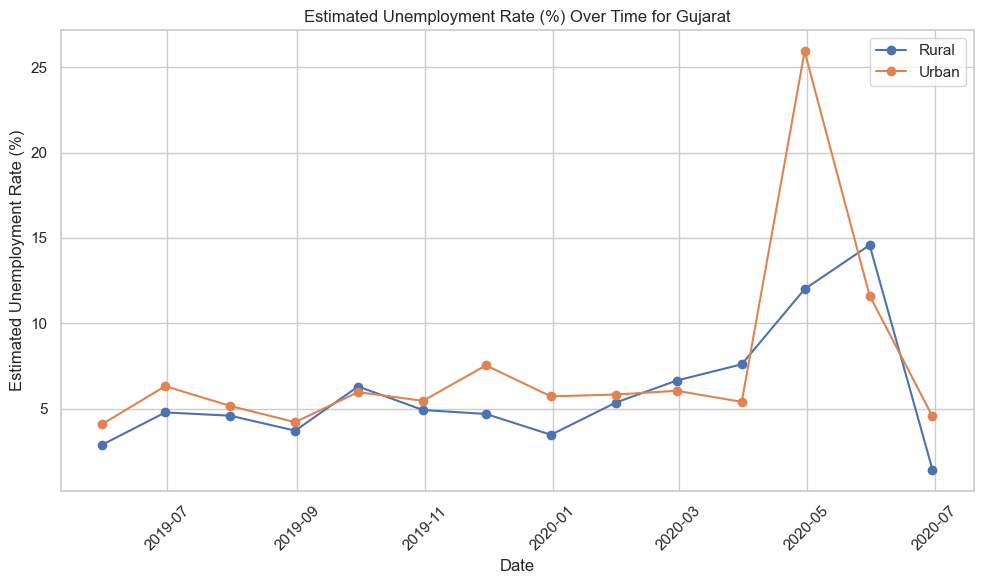

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


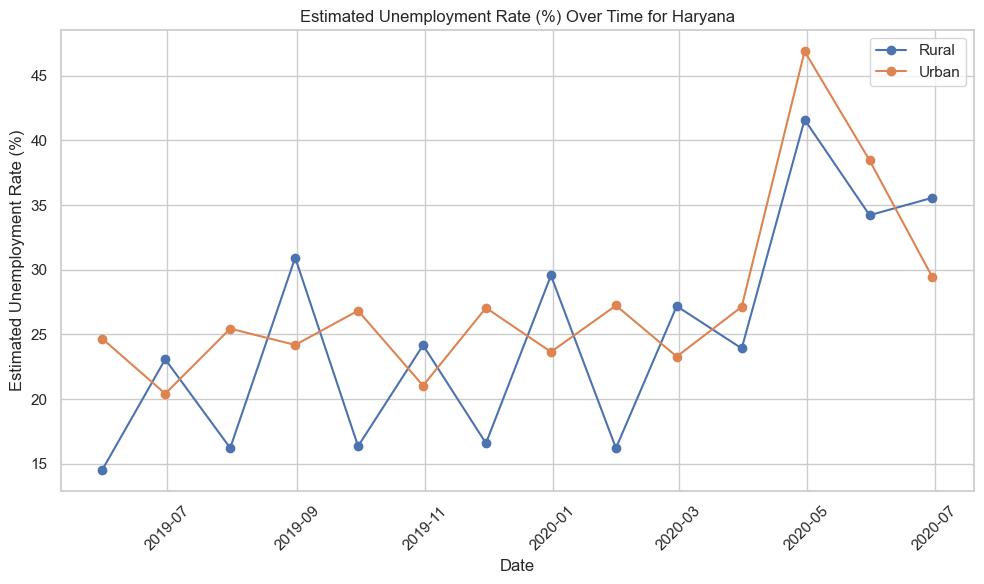

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


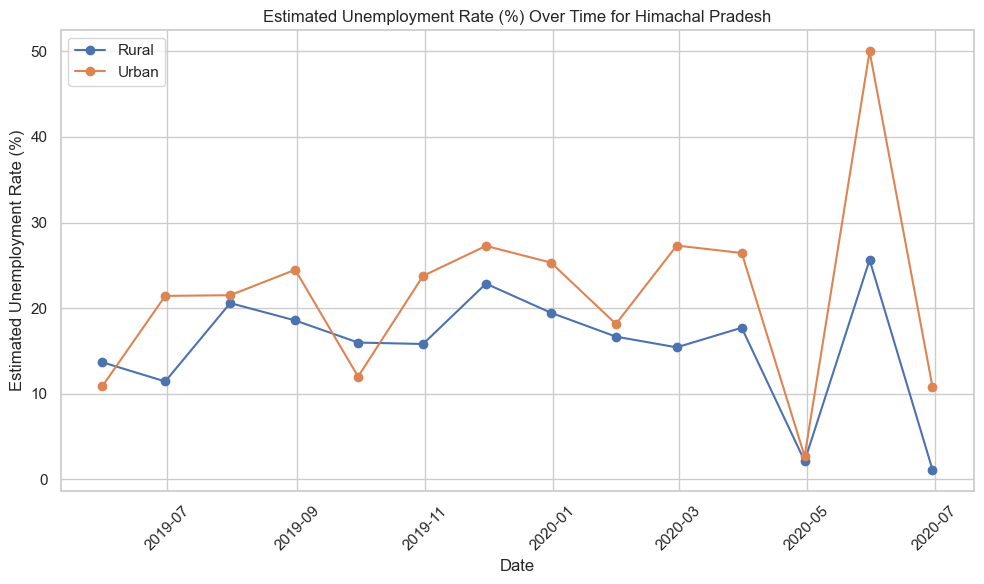

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


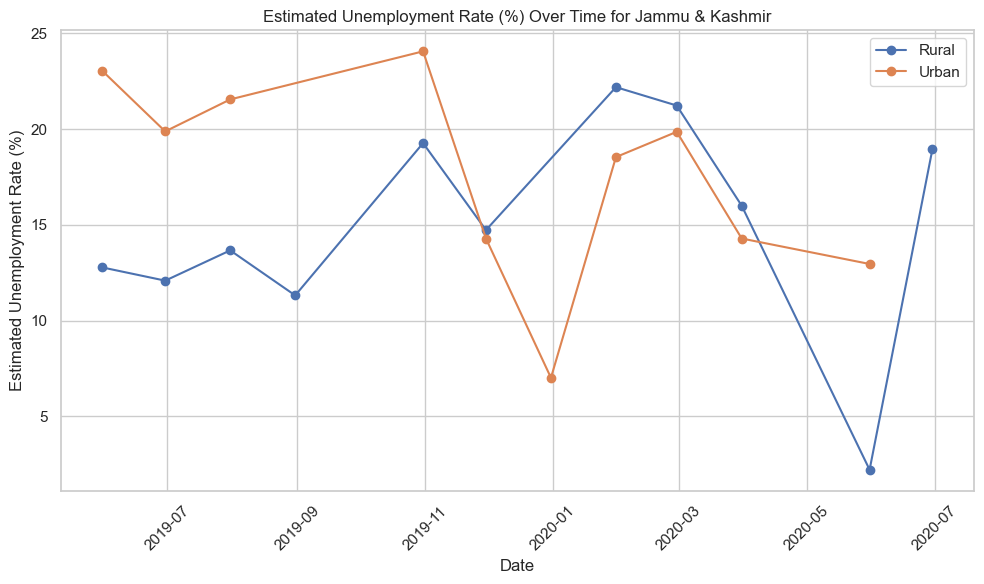

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


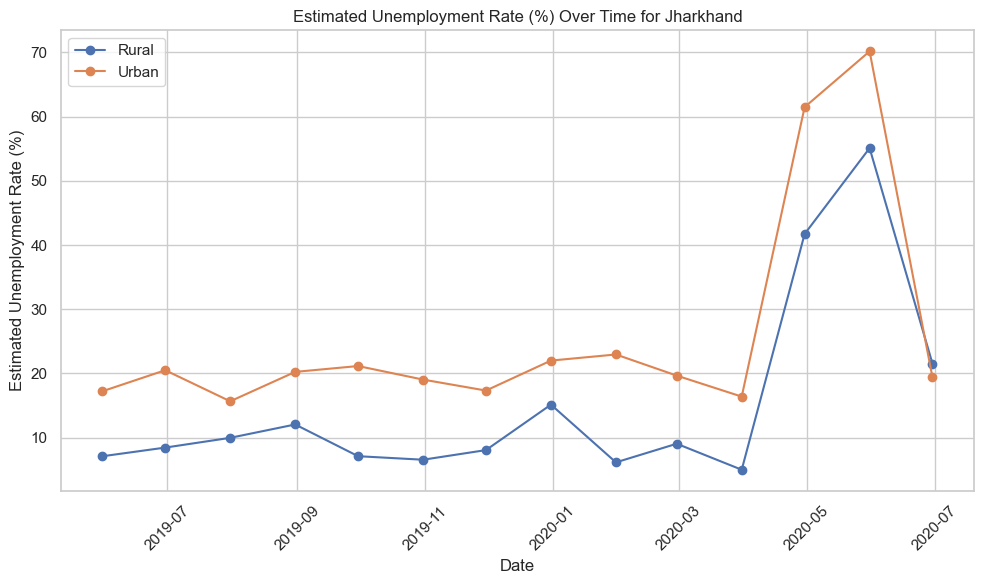

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


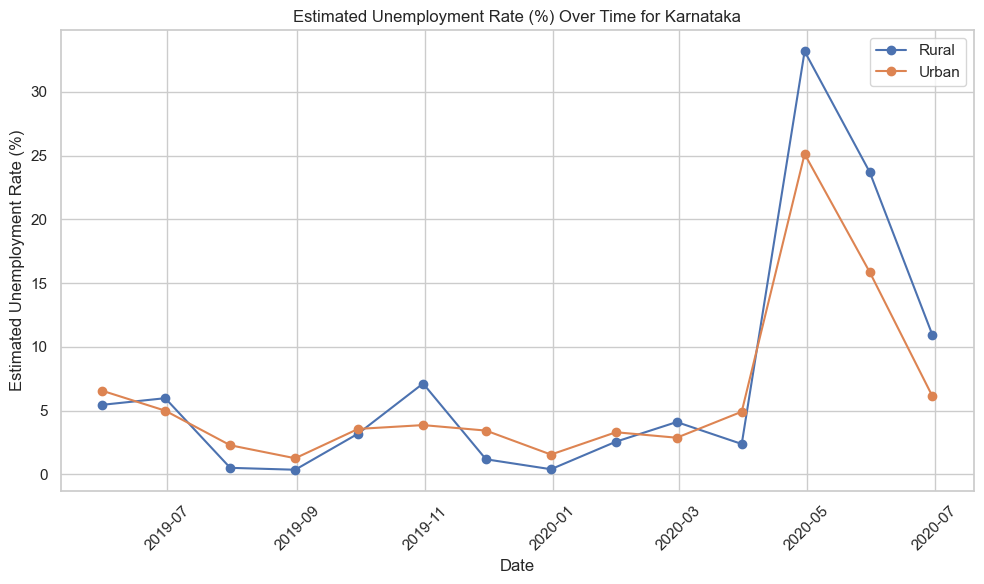

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


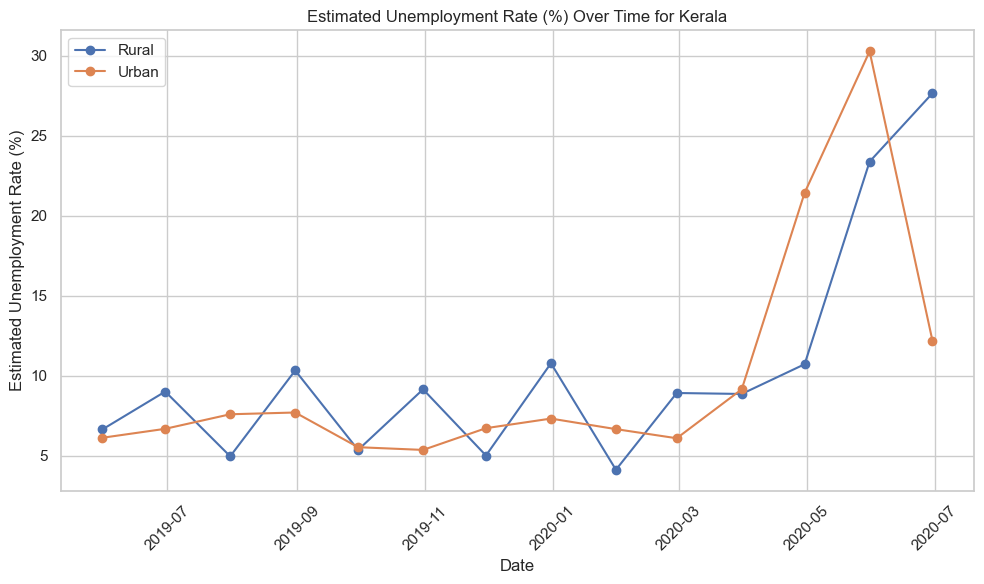

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


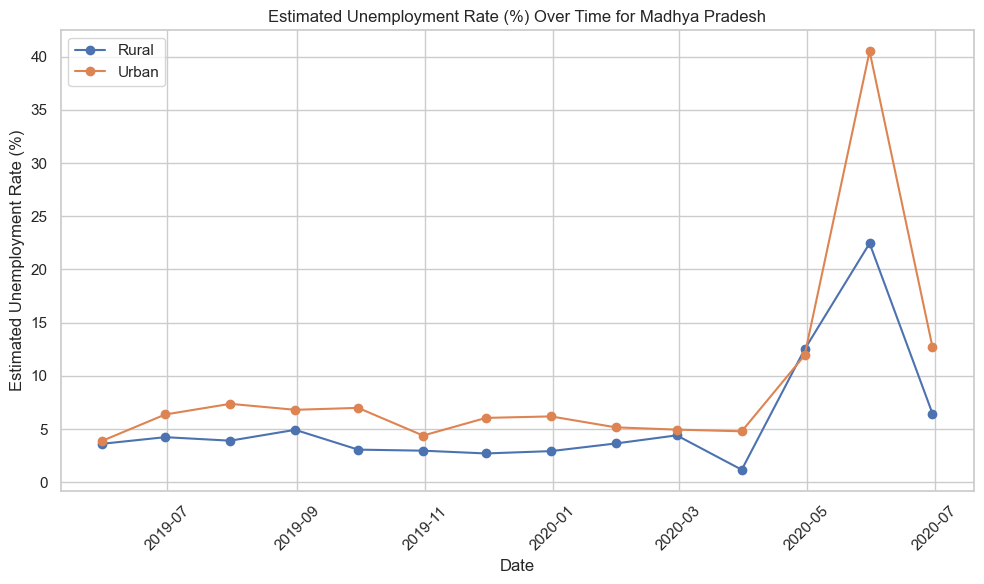

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


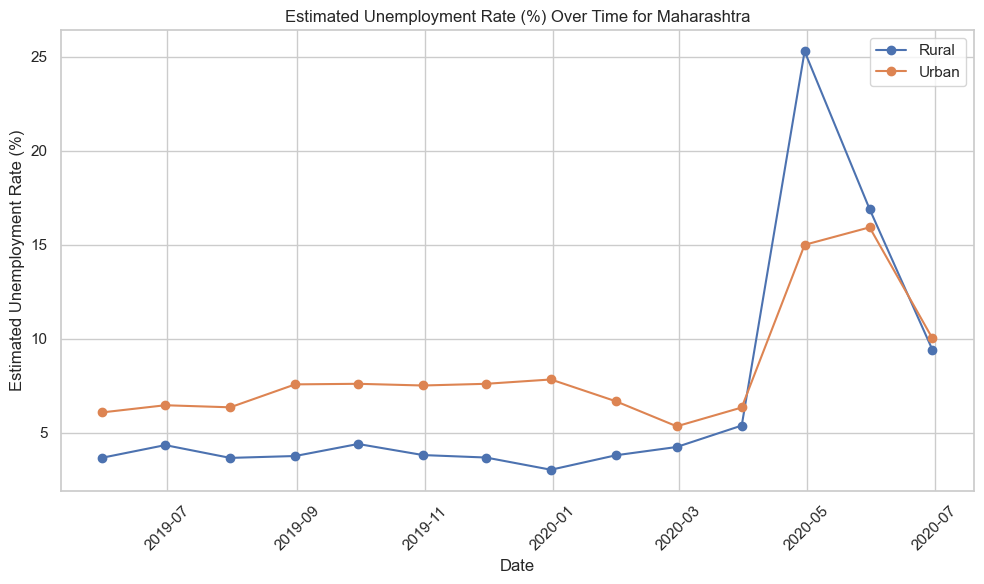

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


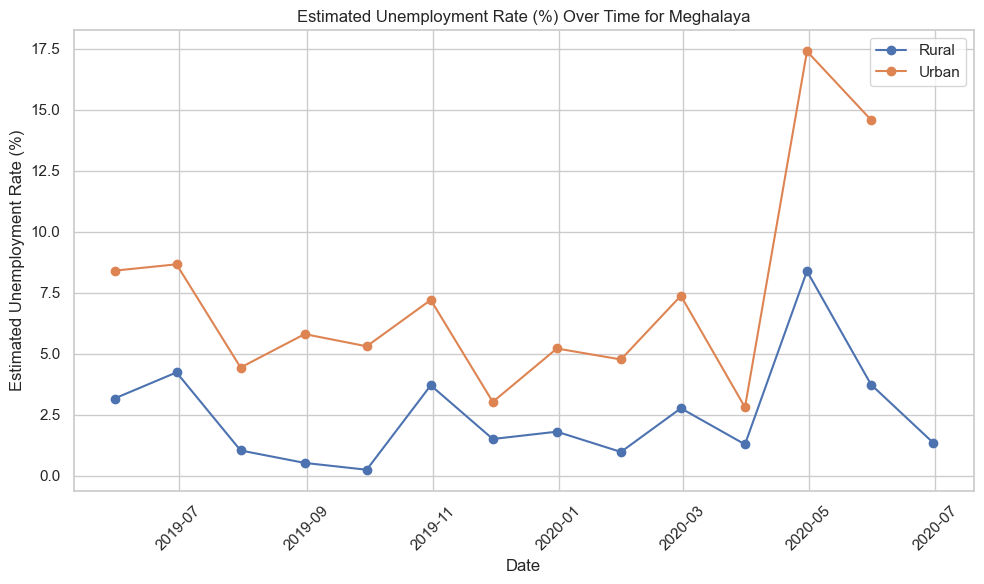

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


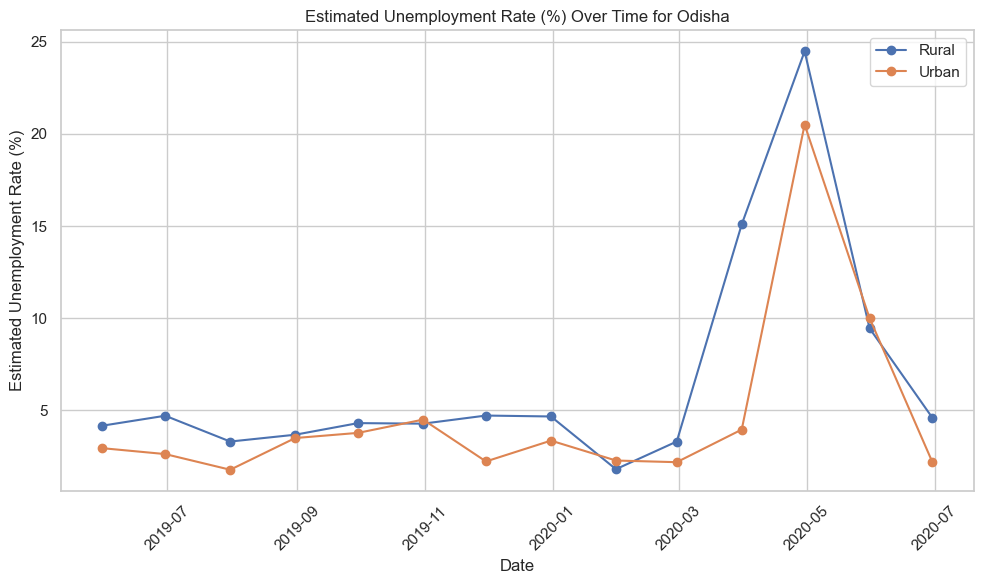

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


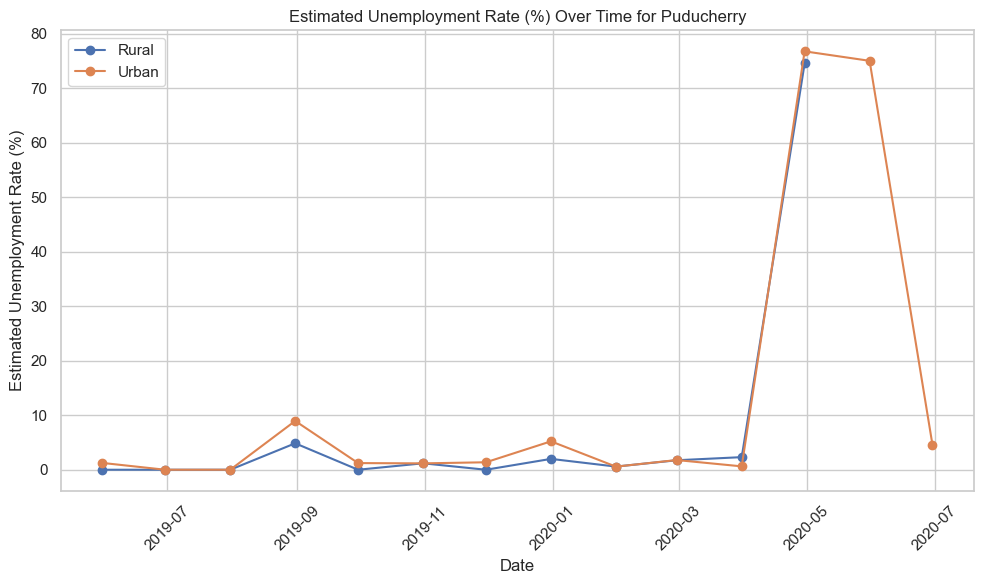

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


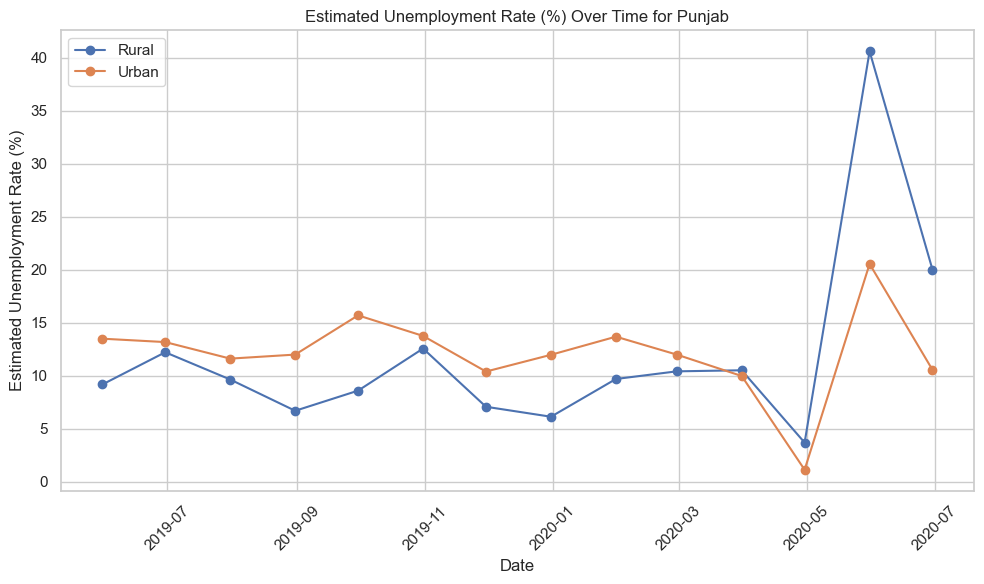

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


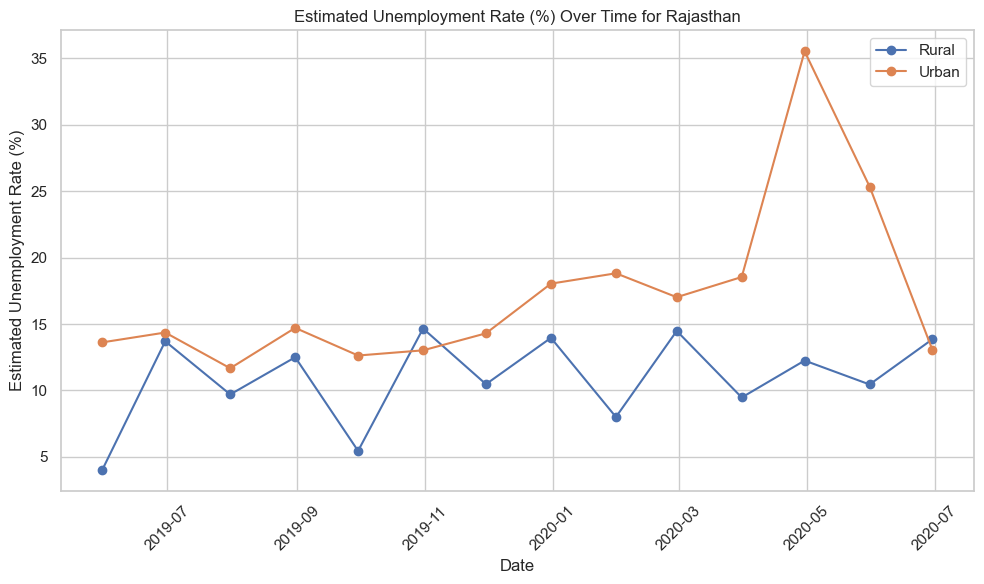

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


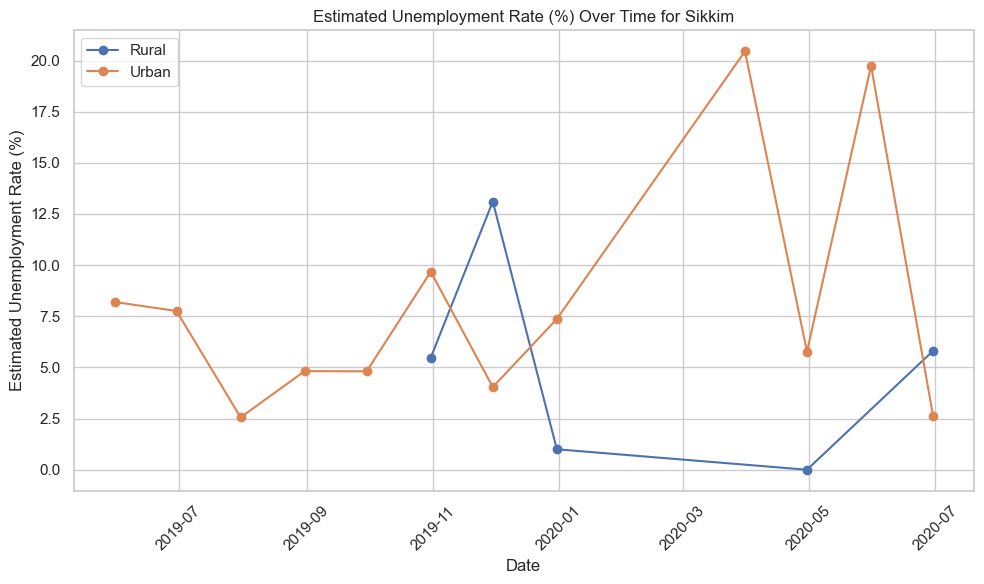

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


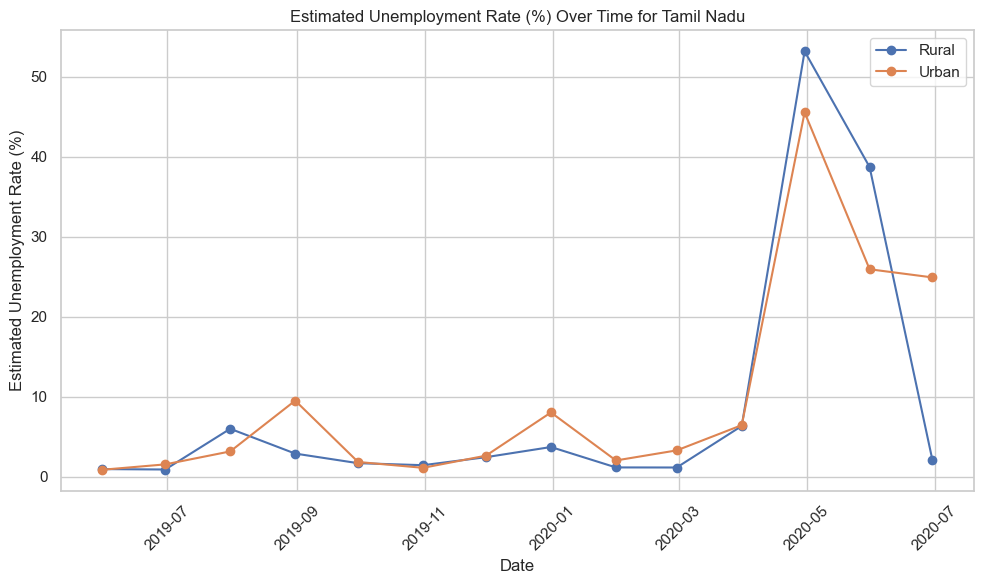

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


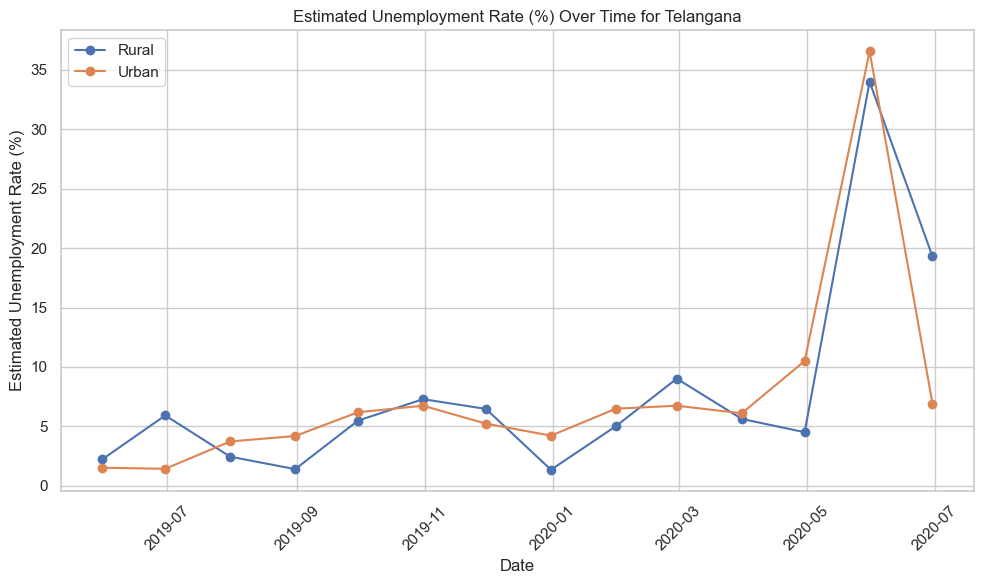

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


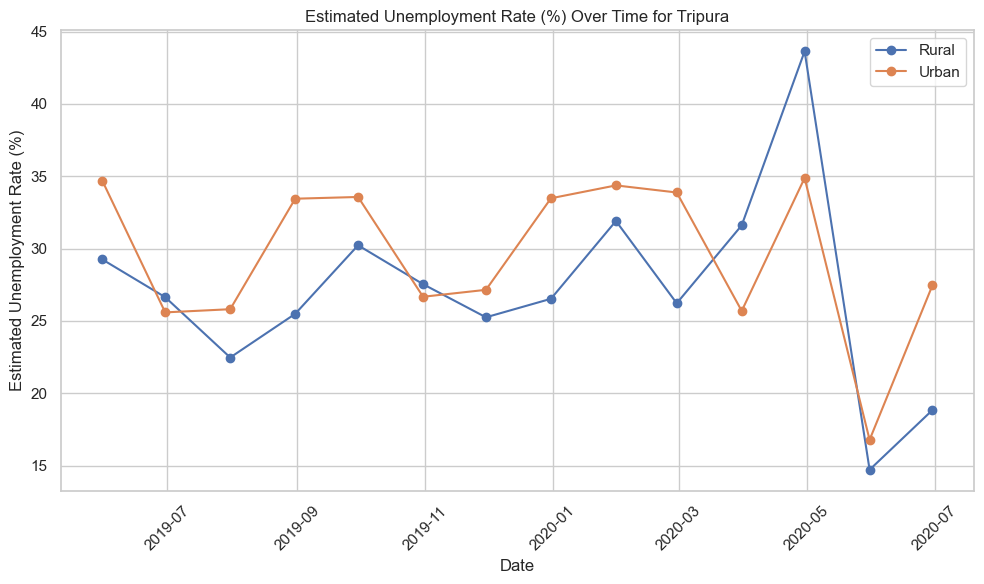

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


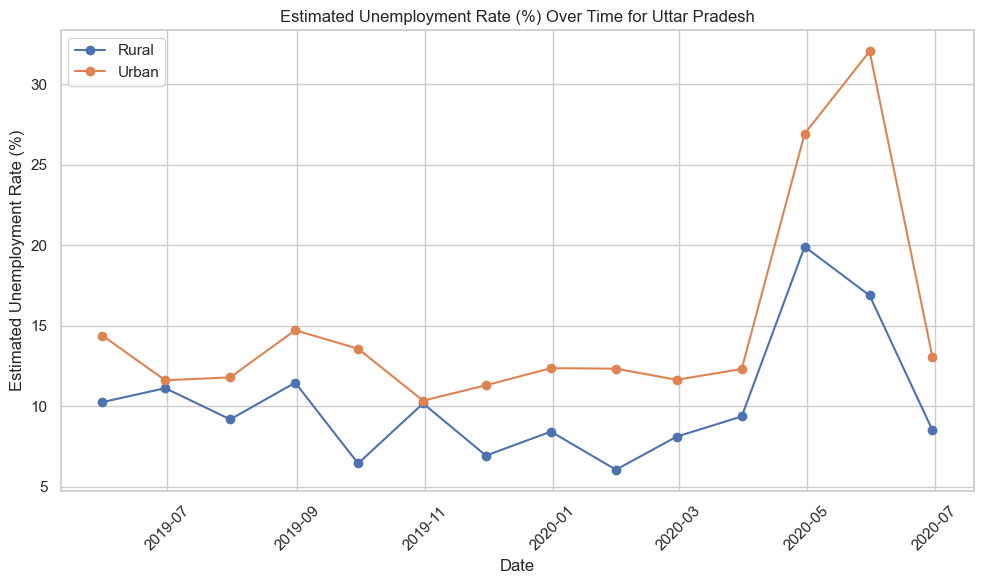

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


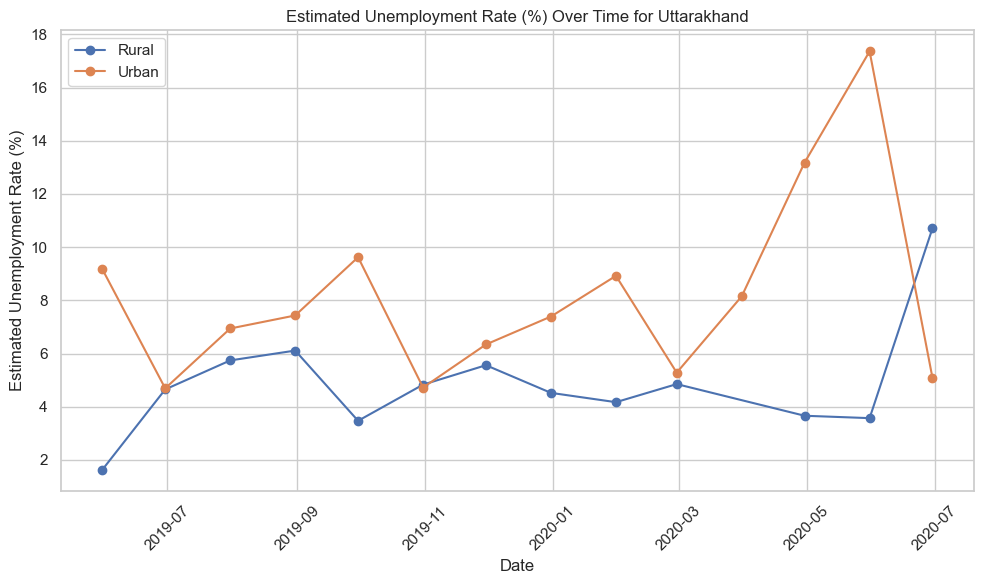

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\3549368065.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  region_data['Date'] = pd.to_datetime(region_data['Date'])


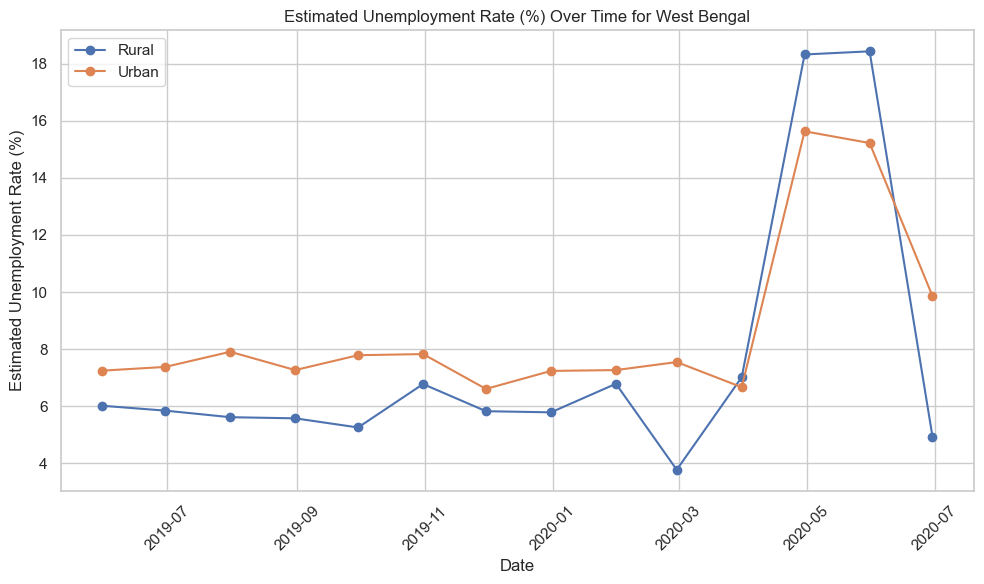

In [32]:
plot_rate_col_rate(grouped_df, 'Estimated Unemployment Rate (%)')

# Unemployement Over Time & Unemployement Rate Before and After Covid

C:\Users\ayush\AppData\Local\Temp\ipykernel_21660\2424503480.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


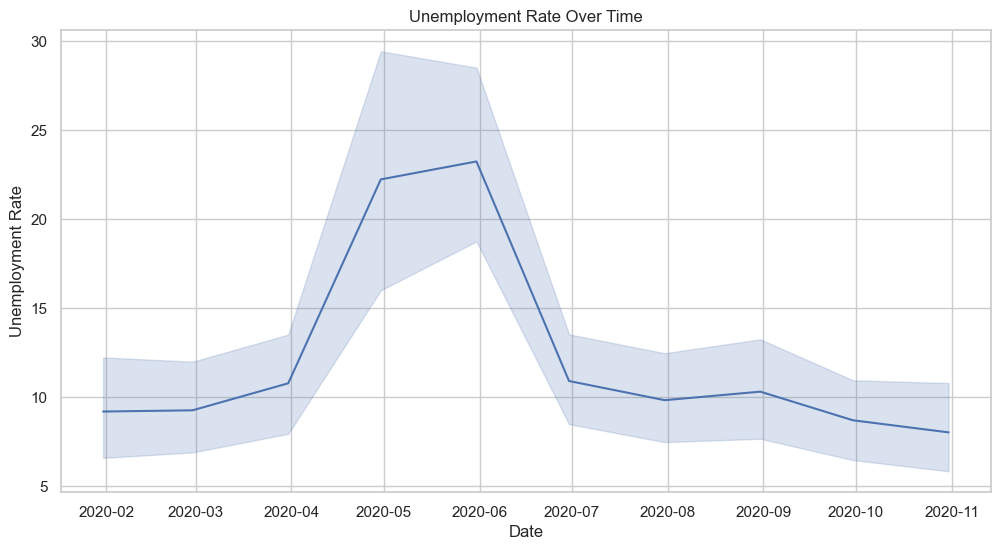

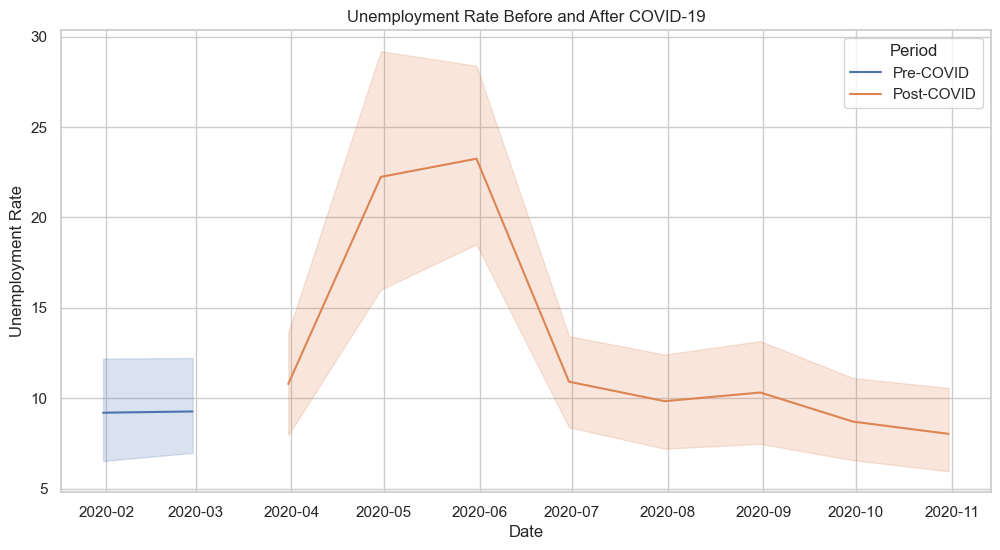

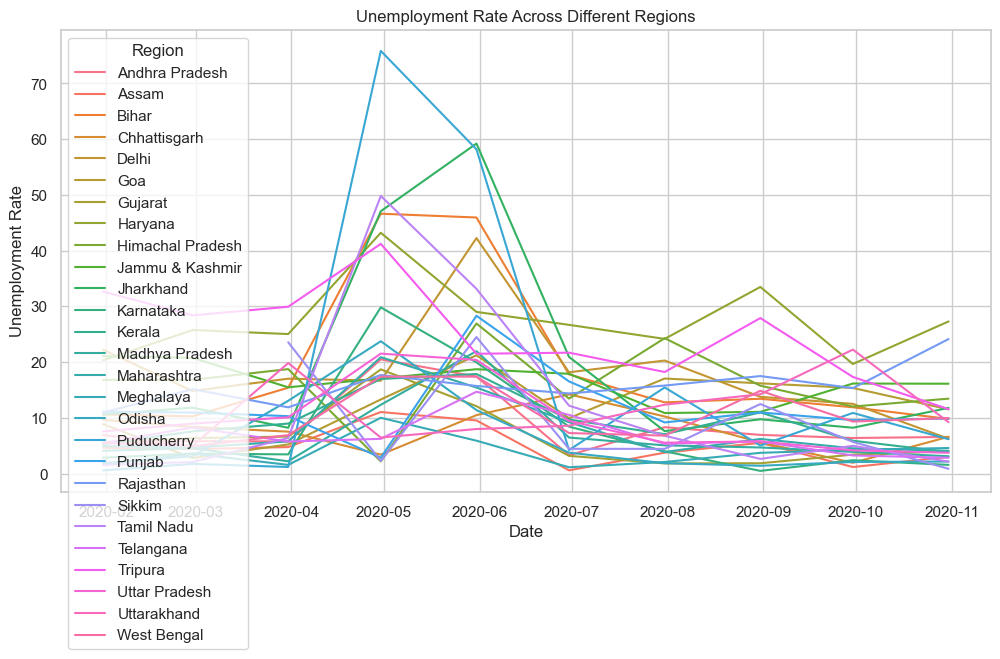

In [33]:
file_path = r'C:\Users\ayush\Downloads\Unemployment_Rate_upto_11_2020 - Unemployment_Rate_upto_11_2020.csv'
df = pd.read_csv(file_path)

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Drop missing values
df = df.dropna()

# Set plot style
sns.set(style="whitegrid")

# Plot unemployment rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()

# Analyze the impact of COVID-19
covid_start_date = '2020-03-01'
df['Period'] = df['Date'].apply(lambda x: 'Pre-COVID' if x < pd.to_datetime(covid_start_date) else 'Post-COVID')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Period', data=df)
plt.title('Unemployment Rate Before and After COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(title='Period')
plt.show()

# If the dataset includes regions
if 'Region' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=df)
    plt.title('Unemployment Rate Across Different Regions')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate')
    plt.legend(title='Region')
    plt.show()



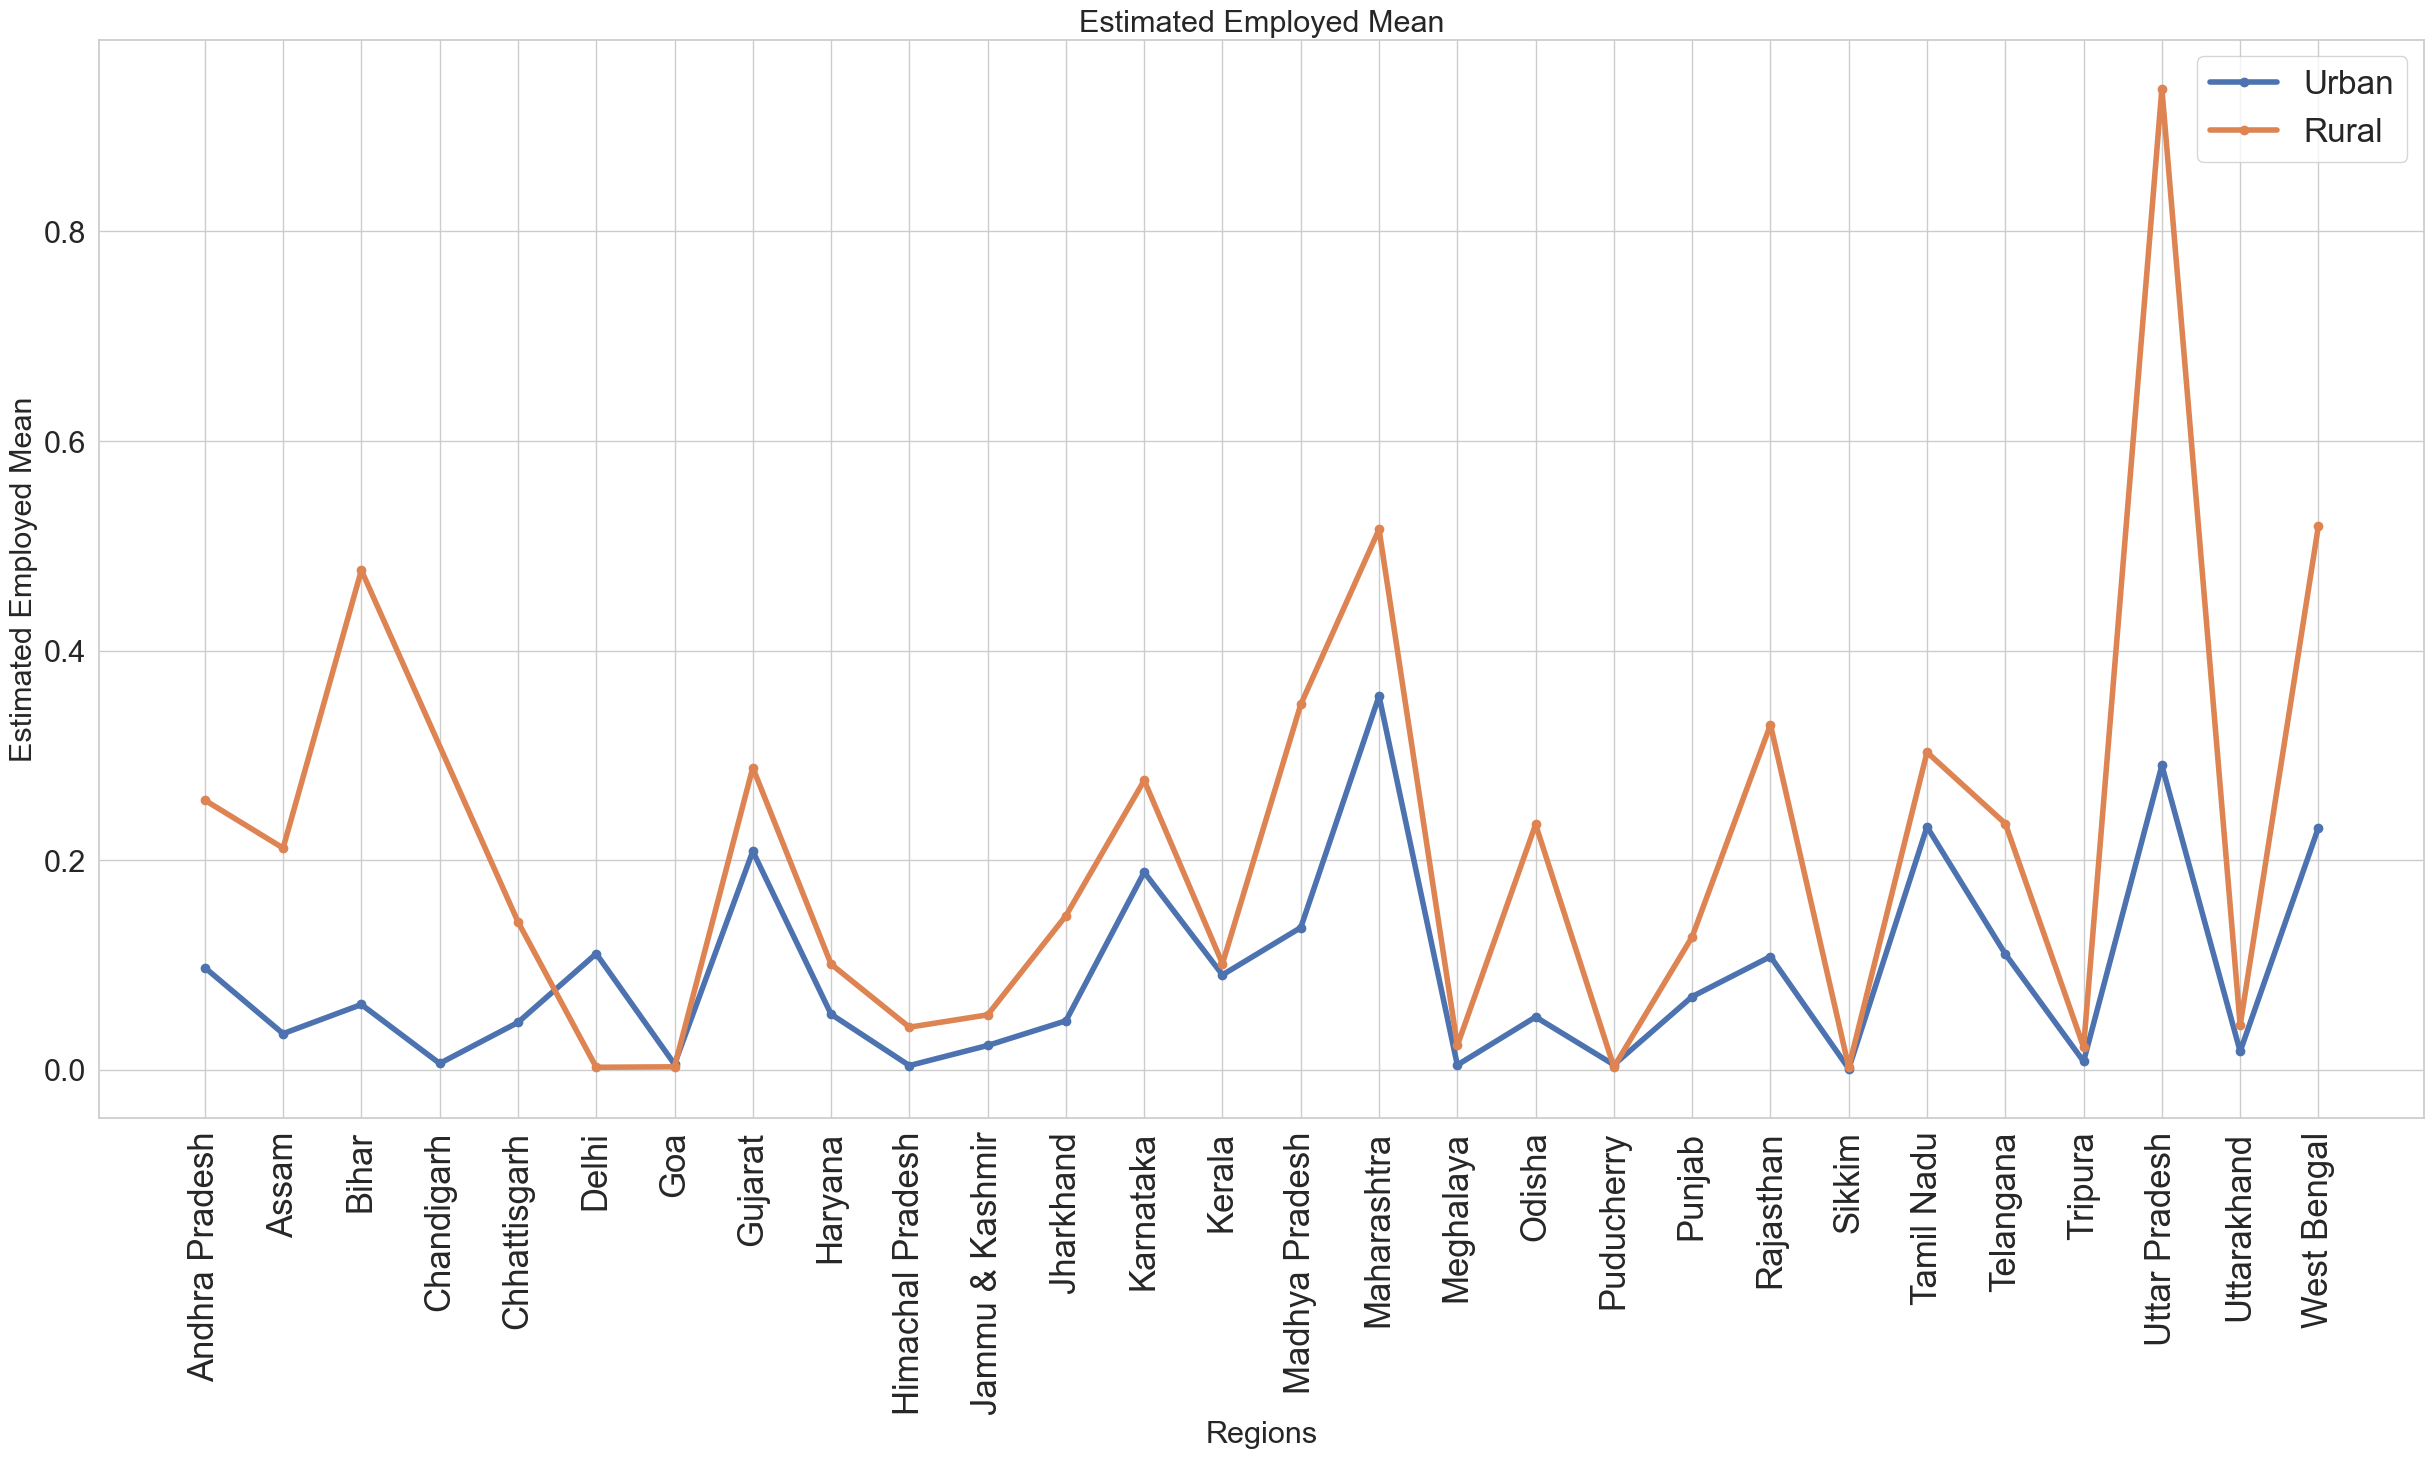

In [34]:
plot_comparison(grouped_urban_stats['Estimated Employed Mean'], grouped_rural_stats['Estimated Employed Mean'], 'Estimated Employed Mean', 'Estimated Employed Mean')

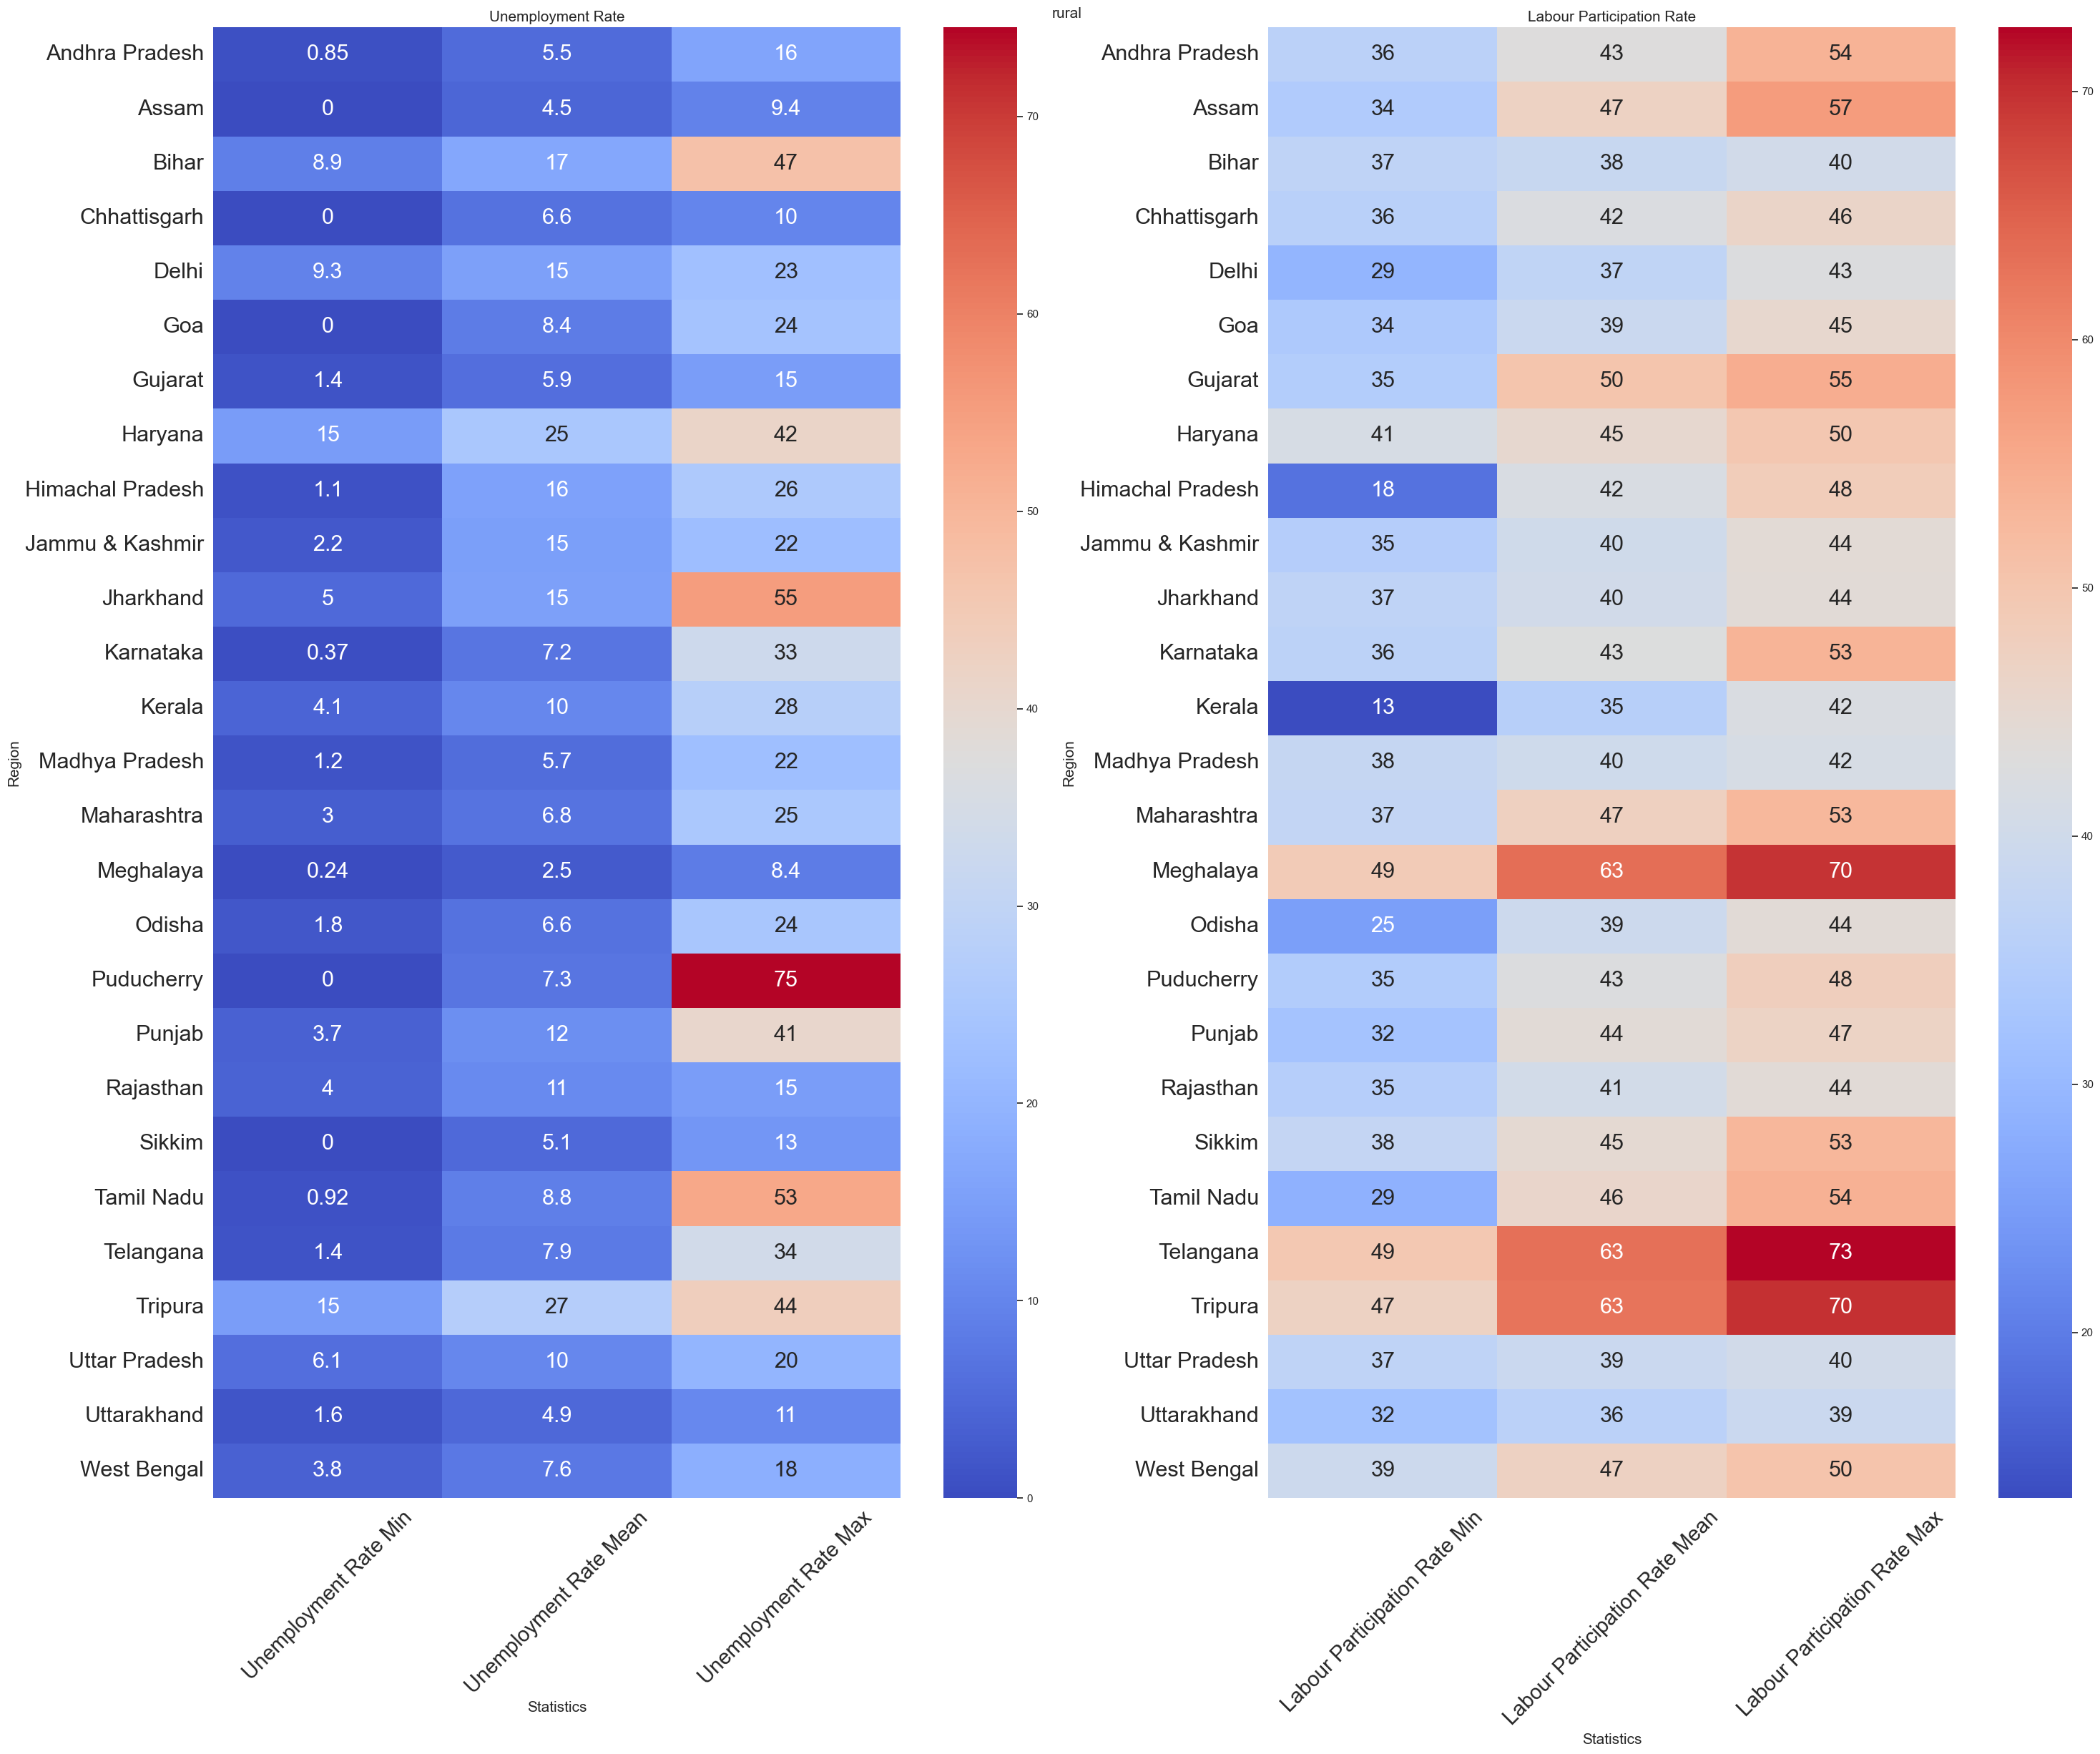

In [37]:
plot_heatmap_(grouped_rural_stats,'rural')

In [40]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Region', columns='Date', values='Estimated Unemployment Rate (%)')


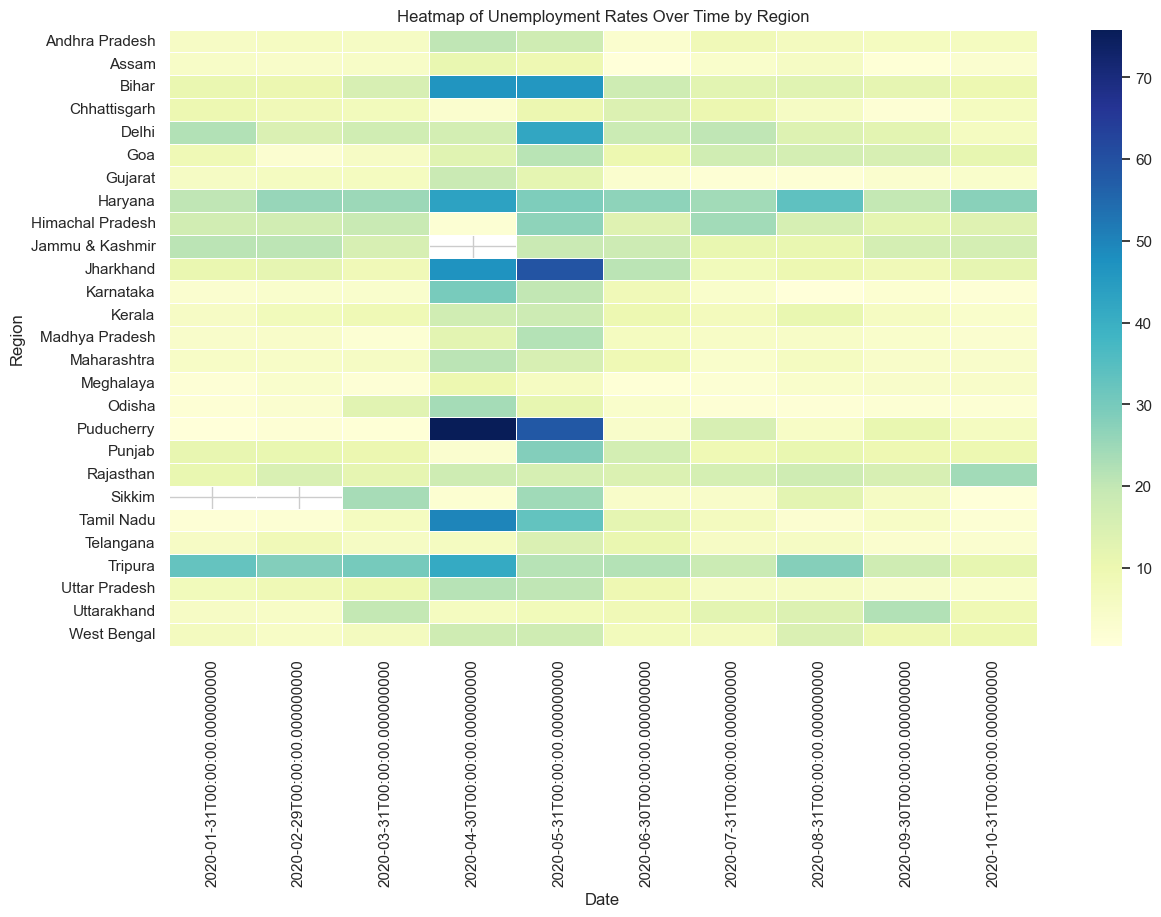

In [43]:
# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Unemployment Rates Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Region')
plt.show()


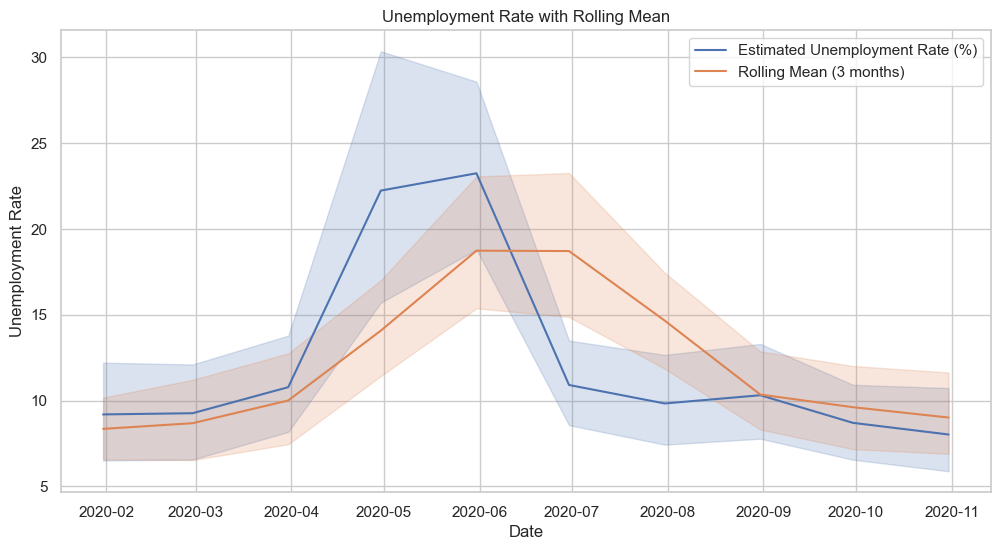

In [49]:
# Calculate rolling mean
df['Rolling_Mean'] = df['Estimated Unemployment Rate (%)'].rolling(window=3).mean()

# Plot the rolling mean
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, label='Estimated Unemployment Rate (%)')
sns.lineplot(x='Date', y='Rolling_Mean', data=df, label='Rolling Mean (3 months)')
plt.title('Unemployment Rate with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


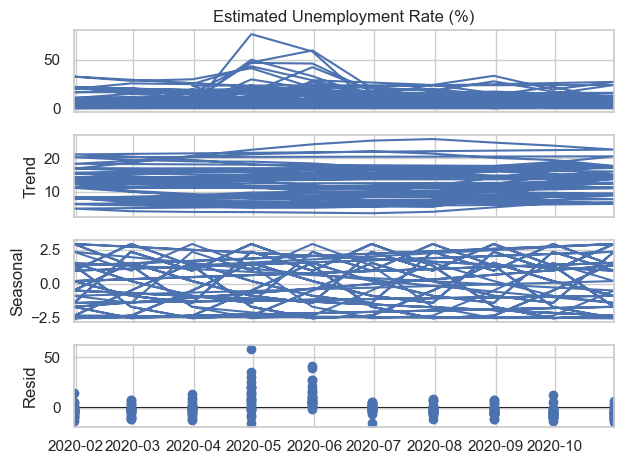

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df.set_index('Date')['Estimated Unemployment Rate (%)'], model='additive', period=12)

# Plot the decomposed components
decomposition.plot()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

267    11.406083
268    10.484597
269    10.146138
270    10.841963
271    10.612246
272    10.496578
273    10.641790
274    10.600837
275    10.541986
276    10.593501
277    10.595692
278    10.578733
Name: predicted_mean, dtype: float64


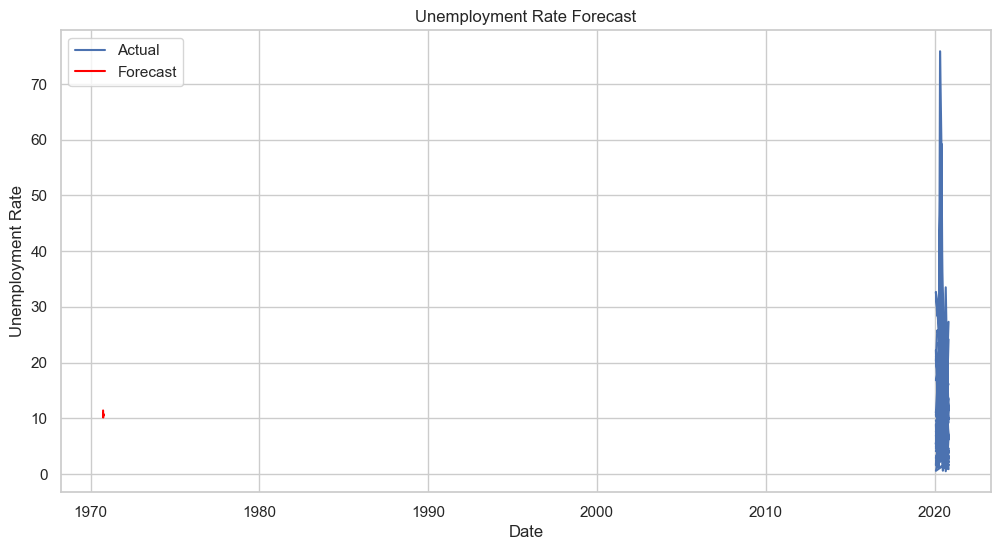

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df.set_index('Date')['Estimated Unemployment Rate (%)'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=12)
print(forecast)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


#  So this graph clearly says that how was unemployment rate in  covid times